## Enhancing credit card fraud detection with SMOTE

### Import Libraries & Data

In [1]:
# import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Suppress the FutureWarning temporarily - 
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load the credit card transaction data
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### Exploratory Data Analysis

In [5]:
# Draw A Random Sample of the Data
# Perform random sampling because of the data size
# Select a sample of 100000 from the dataset
sample_size = 100000
sampled_df = df.sample(n=sample_size, random_state=42, ignore_index=True)

sampled_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.929509,1.296477,0.361110,0.0,0.0,0.0,1.0,0.0
1,0.611179,0.208295,3.118884,0.0,0.0,0.0,1.0,0.0
2,3.956062,0.529194,1.579942,1.0,0.0,0.0,0.0,0.0
3,21.798902,0.019399,11.416909,1.0,0.0,0.0,0.0,0.0
4,3.310635,1.707802,2.028915,1.0,0.0,0.0,0.0,0.0


In [6]:
#Statistical summary for original data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
#Statistical summary for sampled data
sampled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,100000.0,26.678631,70.905764,0.021322,3.847923,9.932790,25.637996,10632.723672
distance_from_last_transaction,100000.0,5.127558,22.246738,0.000434,0.298247,1.007553,3.354382,1639.108950
ratio_to_median_purchase_price,100000.0,1.813761,2.831948,0.006125,0.476733,0.997745,2.090030,267.802942
repeat_retailer,100000.0,0.881010,0.323778,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,100000.0,0.349540,0.476827,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,100000.0,0.100020,0.300028,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,100000.0,0.651620,0.476459,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,100000.0,0.087030,0.281880,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
# Find the means for sampled_df & data
sampled_df_mean = sampled_df.drop(columns='fraud').mean().to_frame().T
data_mean = df.drop(columns='fraud').mean().to_frame().T

# Find the standard deviations for sampled_df & data
sampled_df_std = sampled_df.drop(columns='fraud').std().to_frame().T
data_std = df.drop(columns='fraud').std().to_frame().T

# concatenate the four dataframes
df_compared = pd.concat([sampled_df_mean, data_mean, sampled_df_std, data_std], axis=0).reset_index(drop=True)
df_compared = df_compared.rename(index={0: 'Sample Mean', 1: 'Data Mean', 2: 'Sample Std', 3: 'Data Std'})

print(df_compared.T.to_string())

                                Sample Mean  Data Mean  Sample Std   Data Std
distance_from_home                26.678631  26.628792   70.905764  65.390784
distance_from_last_transaction     5.127558   5.036519   22.246738  25.843093
ratio_to_median_purchase_price     1.813761   1.824182    2.831948   2.799589
repeat_retailer                    0.881010   0.881536    0.323778   0.323157
used_chip                          0.349540   0.350399    0.476827   0.477095
used_pin_number                    0.100020   0.100608    0.300028   0.300809
online_order                       0.651620   0.650552    0.476459   0.476796


Compare the samplea and original data statistics. Here are some observations:

- Mean (Average):

    The sample mean and data mean are quite close for all variables, indicating that the sample is representative of the population in terms of the mean values.

- Standard Deviation:

    The sample standard deviation and data standard deviation for most variables are relatively close, with some differences. This suggests that the sample captures the variability in the data, but there may be some minor differences in the spread of the data.

In [9]:
# Distribution
df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

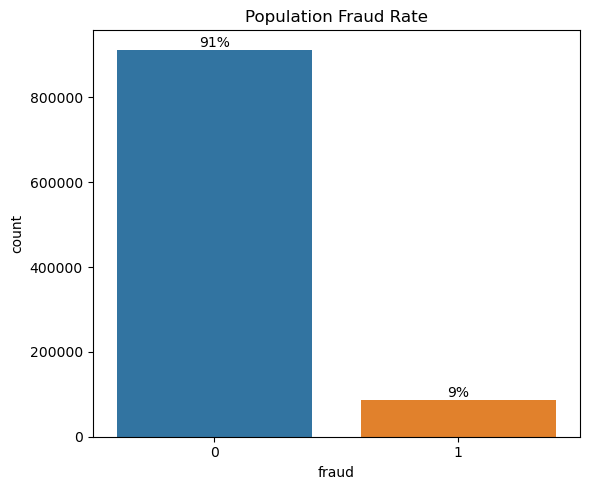

In [10]:
# plot the target variable of the original data
fig, ax = plt.subplots(figsize=(6, 5))

ax = sns.countplot(data=df, x=df['fraud'], ax=ax)

# Add annotations
for c in ax.containers:
    labels=[ f'{x:.0%}' for x in (c.datavalues / df.fraud.count()) ]
    ax.bar_label(c, labels=labels, label_type='edge')
    
ax.set_xticklabels(['0', '1'])
ax.set_title('Population Fraud Rate')

plt.tight_layout()
plt.show()

In [11]:
sampled_df['fraud'].value_counts()

0.0    91297
1.0     8703
Name: fraud, dtype: int64

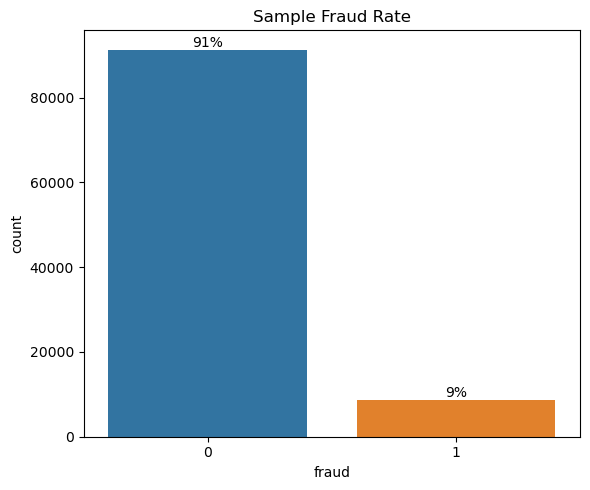

In [12]:
# plot the target variable of the sampled data
fig, ax = plt.subplots(figsize=(6, 5))

ax = sns.countplot(data=sampled_df, x=sampled_df['fraud'], ax=ax)

# Add annotations
for c in ax.containers:
    labels=[ f'{x:.0%}' for x in (c.datavalues / sampled_df.fraud.count()) ]
    ax.bar_label(c, labels=labels, label_type='edge')
    
ax.set_xticklabels(['0', '1'])
ax.set_title('Sample Fraud Rate')

plt.tight_layout()
plt.show()

- Of all the samples, 91% belong to class 0.

- Obviously, it is highly imbalanced binary classification.

In [13]:
# split the data into two sets
numeric_cols = sampled_df.select_dtypes(include='number').columns

# split the numeric_cols into discrete and continuous columns
discrete_threshold = 2

discrete_cols = [col for col in sampled_df.columns if sampled_df[col].nunique() <= discrete_threshold]
continuous_cols = [col for col in sampled_df.columns if sampled_df[col].nunique() > discrete_threshold]

print(discrete_cols)
print(continuous_cols)

['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


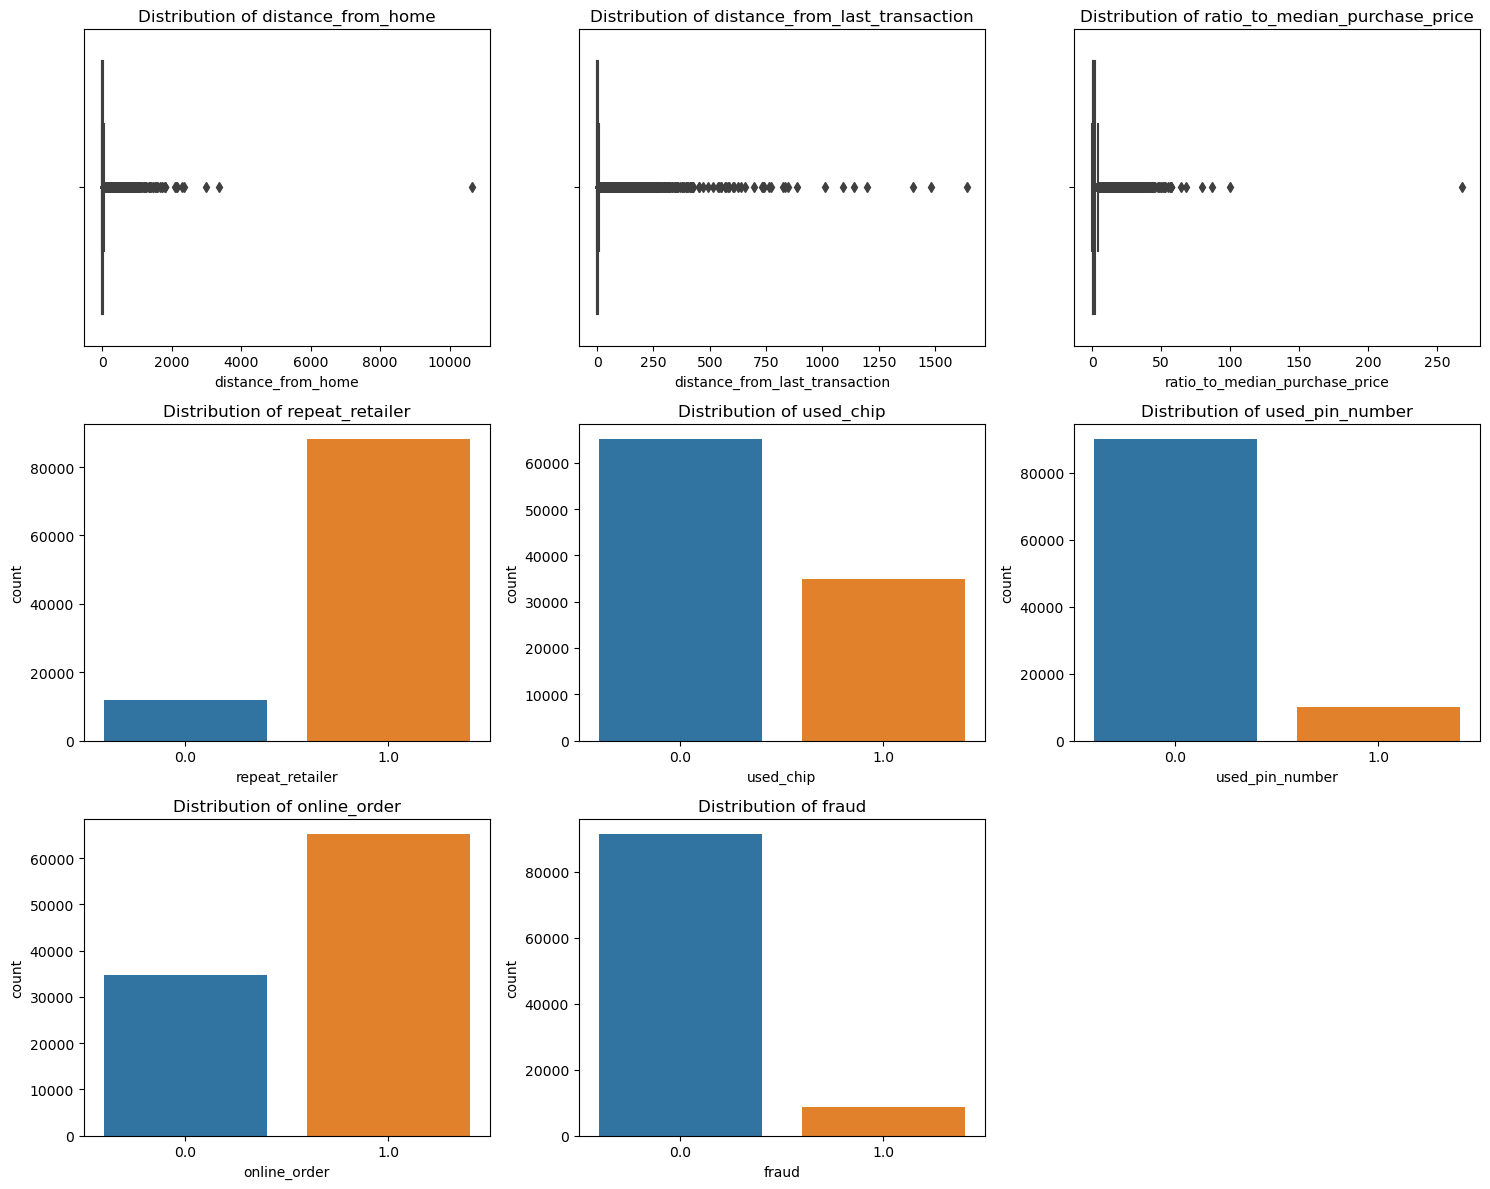

In [14]:
# Plot the discrete columns
plt.figure(figsize=(15, 12))

for i, col in enumerate(sampled_df.columns, 1):
    plt.subplot(3, 3, i)
    if col in discrete_cols:
        sns.countplot(data=sampled_df, x=col)
        plt.title(f'Distribution of {col}')
    else:
        sns.boxplot(data=sampled_df, x=col)
        plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

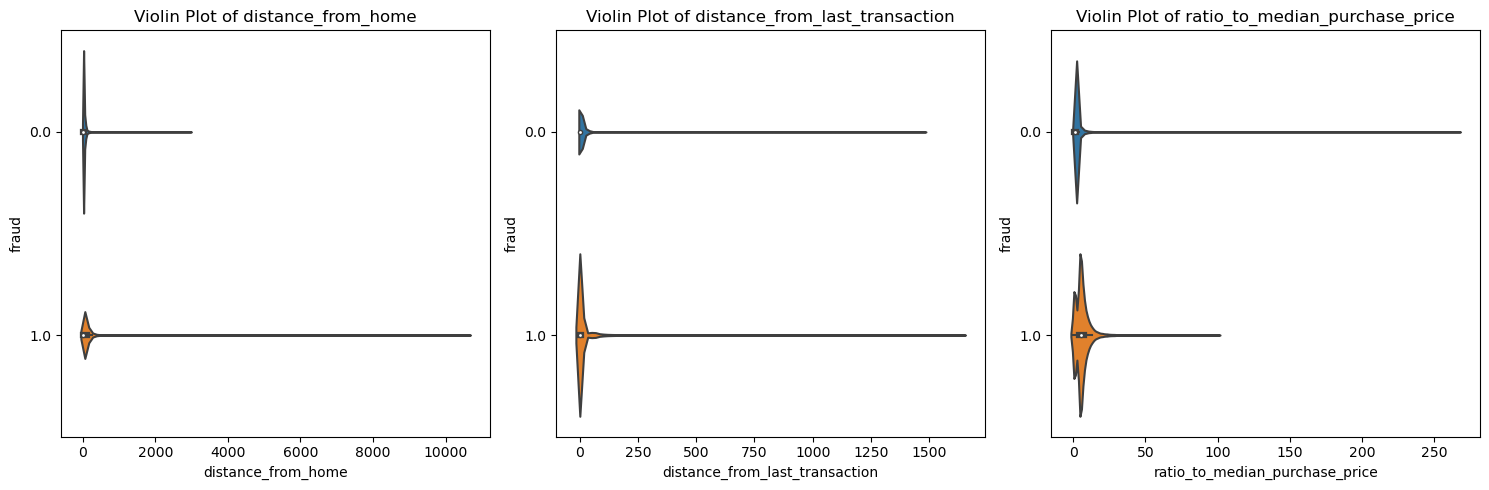

In [15]:
# plot the continuous columns
plt.figure(figsize=(15, 5))

for i, col in enumerate(continuous_cols, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(data=sampled_df, x=sampled_df[col], 
                   y=sampled_df['fraud'].astype('category'))
    plt.title(f'Violin Plot of {col}')

plt.tight_layout()
plt.show()

The plots show the following continuous columns:

- 'distance_from_home', 'distance_from_last_transaction', & 'ratio_to_median_purchase_price'  
seem to have no or little impact on the fraudulent transactions, as they might occur anywhere with any amount of values.

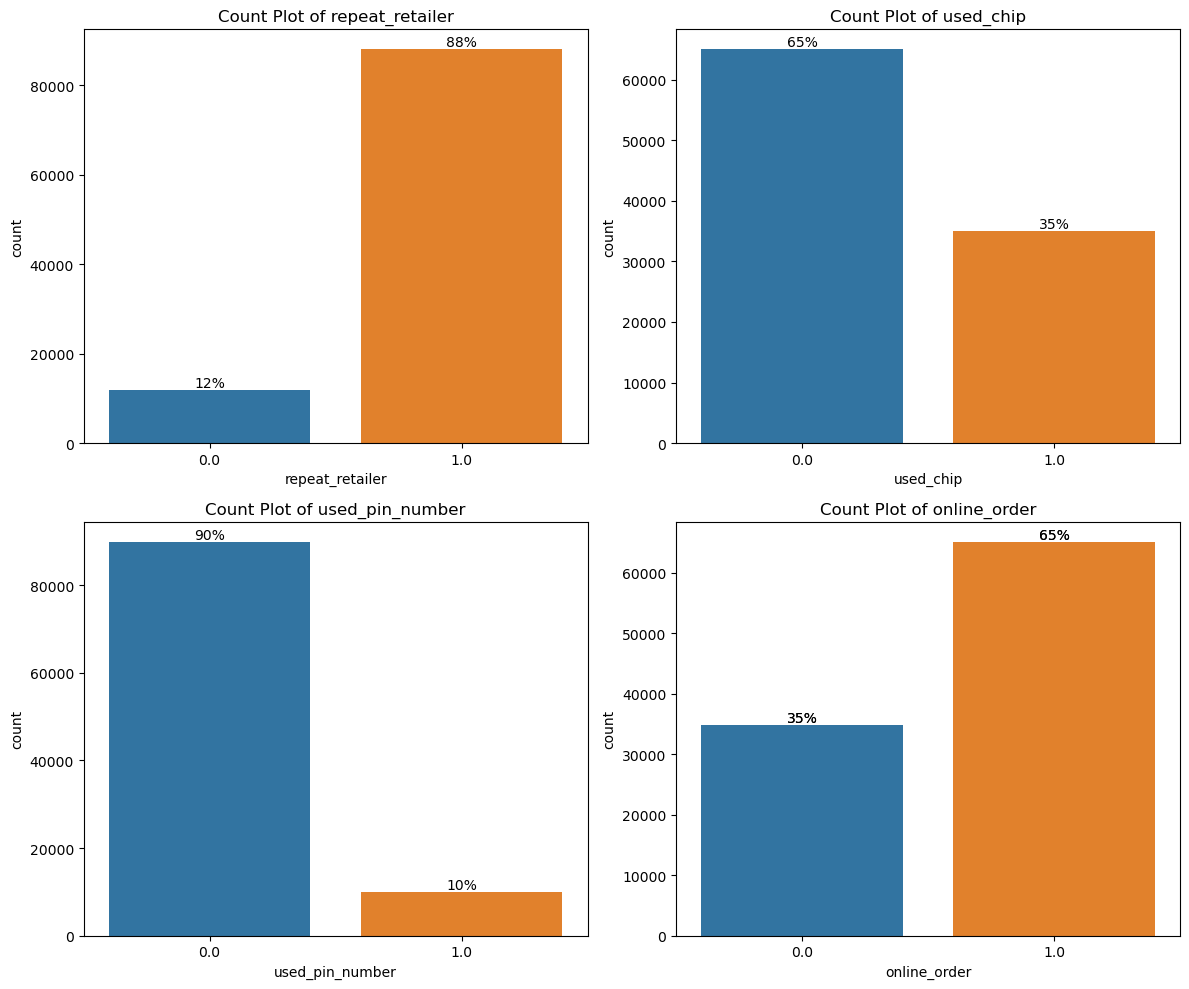

In [16]:
# plot the discrete columns - count plot
plt.figure(figsize=(12, 10))

for i, col in enumerate(discrete_cols, 1):   
    if col != 'fraud':
        plt.subplot(2, 2, i)
        ax = sns.countplot(x=col, data=sampled_df)
        plt.title(f'Count Plot of {col}')

    for c in ax.containers:
        labels=[ f'{x:.0%}' for x in (c.datavalues / len(sampled_df[col])) ]
        ax.bar_label(c, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

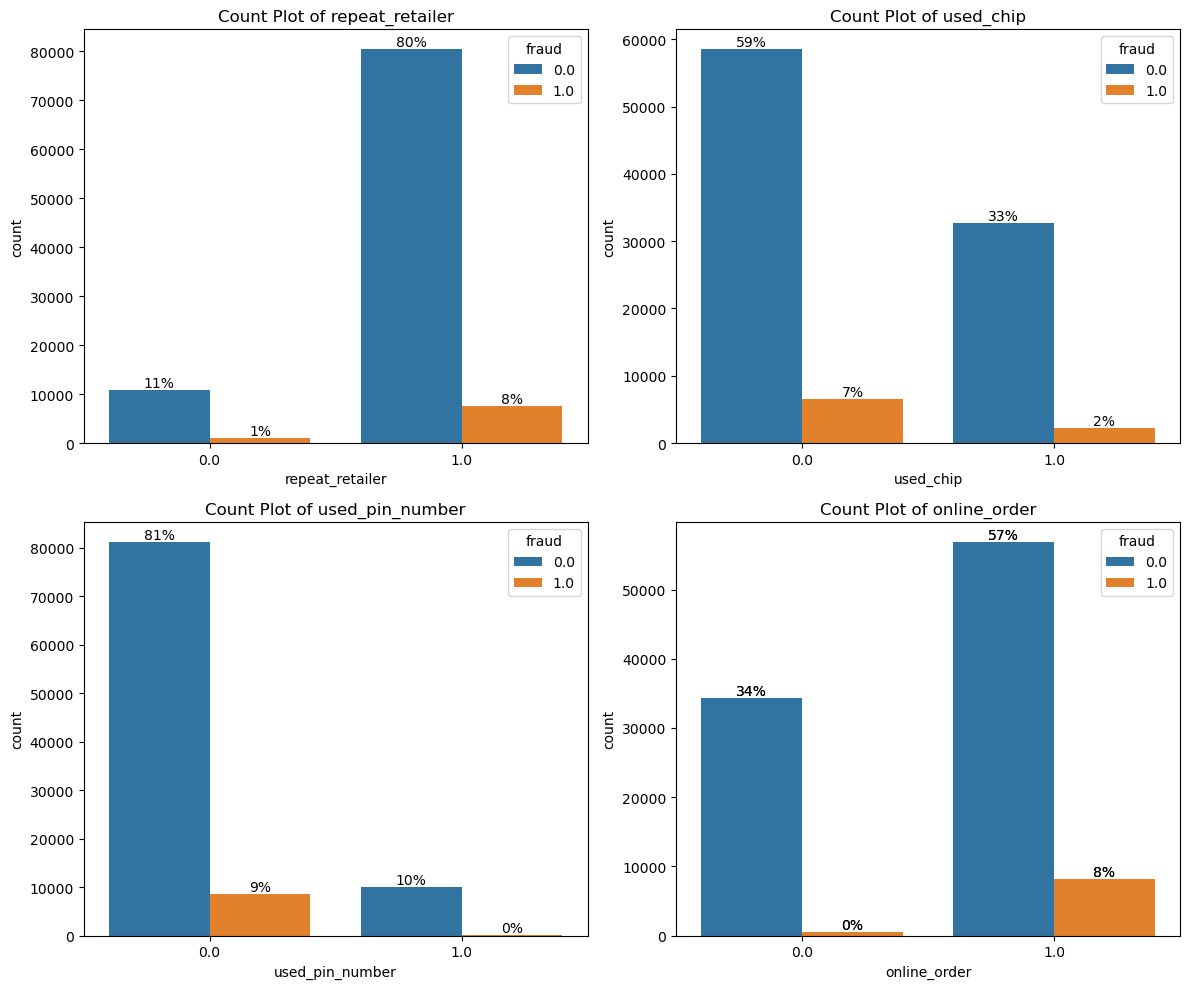

In [17]:
# plot the discrete columns - count plot
plt.figure(figsize=(12, 10))

for i, col in enumerate(discrete_cols, 1):   
    if col != 'fraud':
        plt.subplot(2, 2, i)
        ax = sns.countplot(x=col, hue=sampled_df['fraud'], 
                           data=sampled_df)
        plt.title(f'Count Plot of {col}')

    for c in ax.containers:
        labels=[ f'{x:.0%}' for x in (c.datavalues / sampled_df.fraud.count()) ]
        ax.bar_label(c, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

# Revert back to default warning behavior
warnings.resetwarnings()

#### Summary:

- All transactions  
    9 out of 100 (9%) transactions are fraudulent. 

- 'repeat_retailer'  
    A vast majority of transactions (88%) are done in same retailers, 12% are done in Non-Repeat retailers.  
    Of the total 9% fraudulent transactions,   
    1% of them are from non-repeat transactions, 8% are from repeat.

- 'used_chip' (credit card)          
    Only 35% of the transactions are done with CCs, 65% in other payment methods.  
    Of the total 9% fraudulent transactions,   
    7% of them are from non-used_chip transactions, only 2% are from used_chip.

- 'used_pin_number'  
    Only 10% of the transactions are done with pin numbers, 90% of the transactions are done without,   
    Of the total 9% fraudulent transactions,   
    Over 9% of them are from non-used_pin_number transactions, less than 1% are from used_pin_number.  

- 'online_order'  
    65% of them are online transactions, 35% are non-online orders.  
    Of the total 9% fraudulent transactions,   
    Less than 1% of them are from non-online transactions, 8% are online.


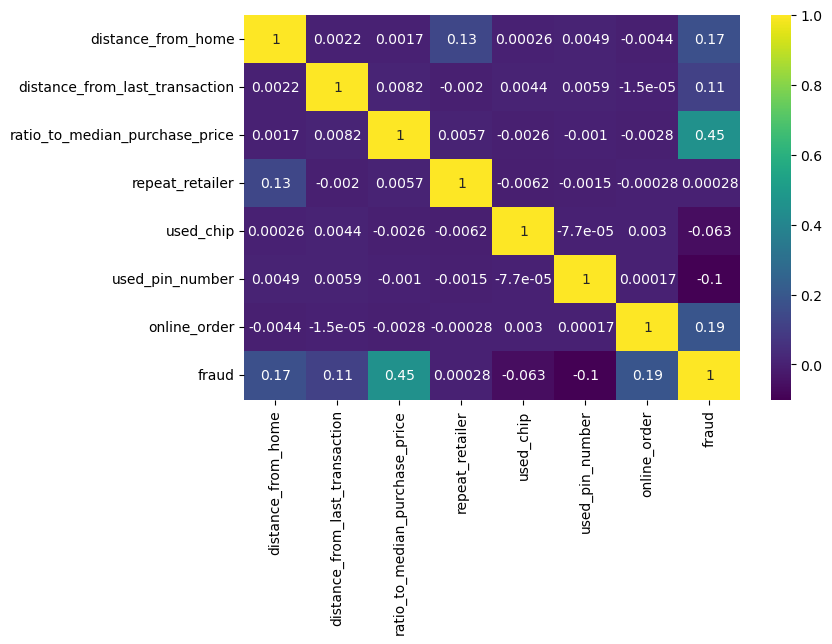

In [18]:
# plot correlation
plt.figure(figsize=(8, 5))

sns.heatmap(sampled_df.corr(), annot=True, cbar=True, cmap='viridis')
plt.show()

In [19]:
# check the correlation with the target variable
target_corr = sampled_df.corr()[['fraud']].sort_values(by='fraud', ascending=False)
target_corr

,fraud
fraud,1.000000
ratio_to_median_purchase_price,0.454247
online_order,0.190089
distance_from_home,0.169890
distance_from_last_transaction,0.111388
repeat_retailer,0.000282
used_chip,-0.062649
used_pin_number,-0.100090


### Summary:

All features except for 'ratio_to_median_purchase_price' has no strong correlation with the target variable.

In [20]:
# Segment Analysis
overall_mean = sampled_df.drop(columns='fraud').mean().to_frame().T

discrete_cols_excl_fraud = [col for col in discrete_cols if col != 'fraud']
segment_mean = sampled_df.groupby('fraud')[continuous_cols + discrete_cols_excl_fraud].mean()

# concatenate the two dataframes
df_means = pd.concat([overall_mean, segment_mean], axis=0).reset_index(drop=True)
df_means = df_means.rename(index={0: 'Overall', 1: '0', 2: '1'})

df_means

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
Overall,26.678631,5.127558,1.813761,0.881010,0.349540,0.100020,0.651620
0,22.959404,4.362476,1.416587,0.880982,0.358763,0.109292,0.623657
1,65.694398,13.153493,5.980232,0.881305,0.252786,0.002758,0.944962


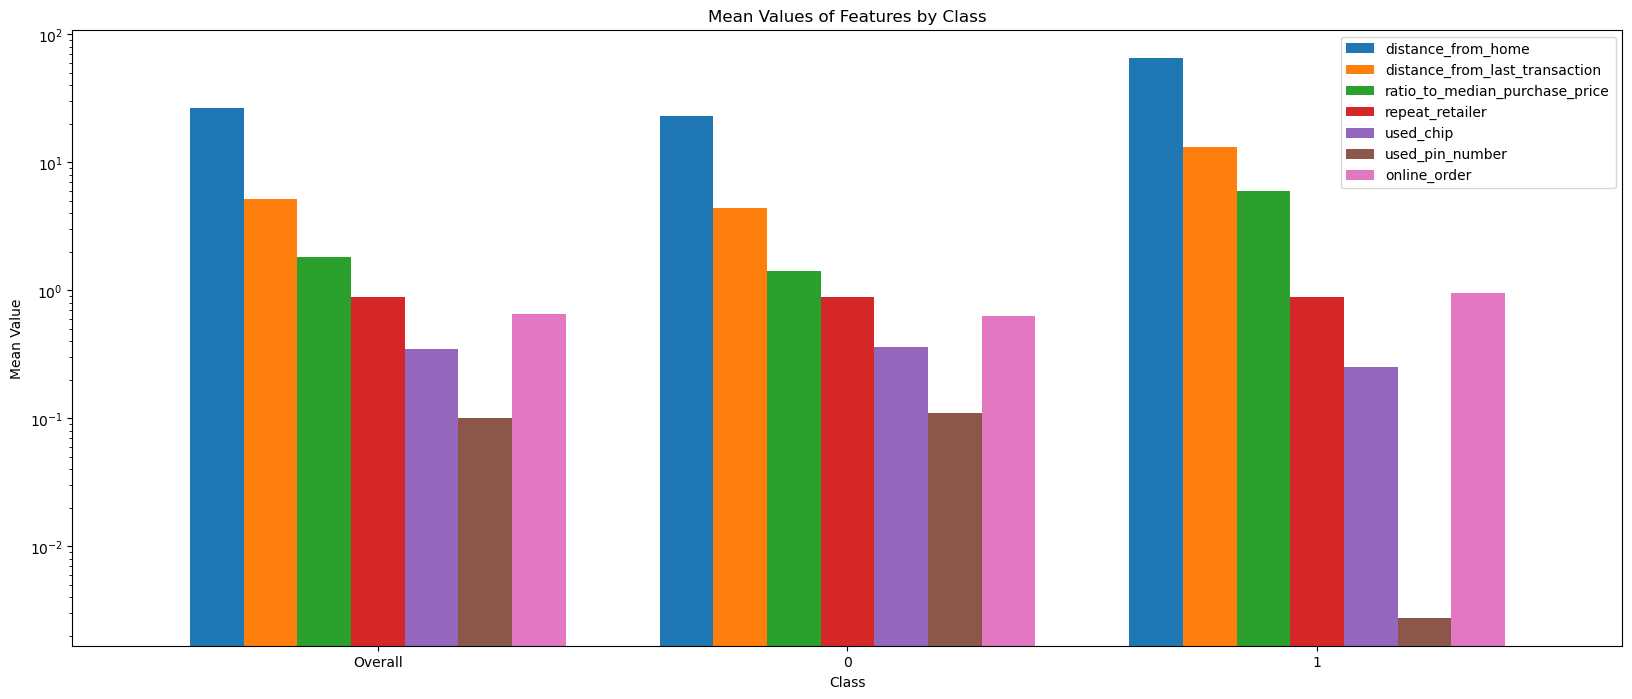

In [21]:
# Plotting
# plt.figure(figsize=(12, 8))
plt.rcParams['figure.figsize'] = (20, 8)

df_means.plot(kind='bar', logy=True, width=0.8)

plt.title('Mean Values of Features by Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)

plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Feature Selection 
# split the data into features & target
X = sampled_df.drop('fraud', axis=1)
y = sampled_df['fraud']

print(X.shape)
print(y.shape)

(100000, 7)
(100000,)


In [24]:
# first, split the data into the training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(67000, 7)
(67000,)
(33000, 7)
(33000,)


In [25]:
# Import imbalace technique algorithims
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

In [26]:
from imblearn.over_sampling import SMOTE, ADASYN
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))


Original dataset shape Counter({0.0: 61147, 1.0: 5853})
Resampled dataset shape Counter({0.0: 61147, 1.0: 61147})
Original dataset shape Counter({0.0: 61147, 1.0: 5853})
Resampled dataset shape Counter({1.0: 61702, 0.0: 61147})


### Build models with SMOTE & ADASYN balanced datasets

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


In [28]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

Model Name : LR SMOTE
Train Accuracy :0.94288
Test Accuracy :0.93542
Train AUC : 0.94288
Test AUC : 0.94242
Train Precision : 0.93575
Test Precision : 0.57647
Train Recall : 0.95107
Test Recall : 0.95088
Train F1 : 0.94335
Test F1 : 0.71779
Confusion Matrix : 
 [[28159  1991]
 [  140  2710]]


Model Name : LR ADASYN
Train Accuracy :0.95046
Test Accuracy :0.94115
Train AUC : 0.95041
Test AUC : 0.94524
Train Precision : 0.94151
Test Precision : 0.60071
Train Recall : 0.96107
Test Recall : 0.95018
Train F1 : 0.95119
Test F1 : 0.73607
Confusion Matrix : 
 [[28350  1800]
 [  142  2708]]




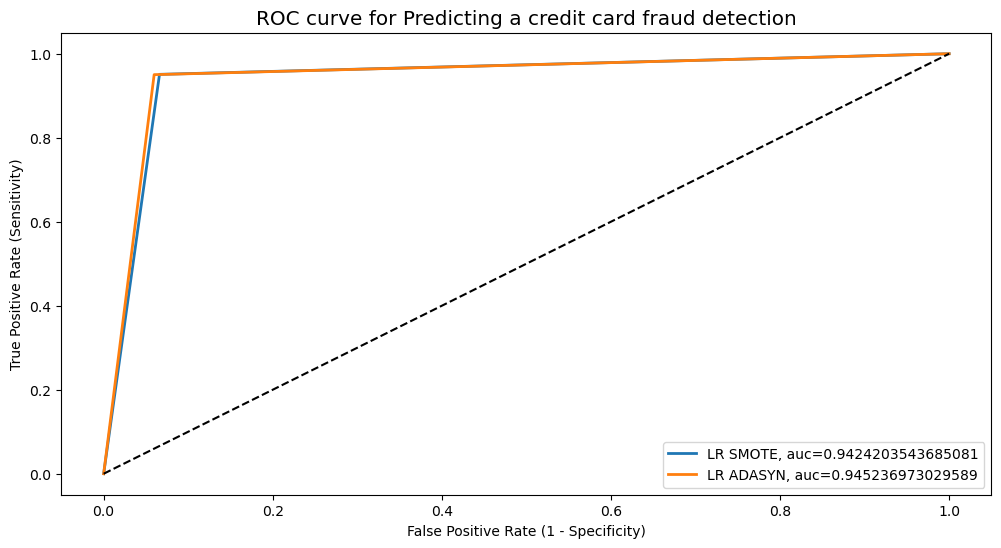

In [29]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote,y_train_smote,X_test,y_test))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

Model Name : DT SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99973
Train AUC : 1.00000
Test AUC : 0.99937
Train Precision : 1.00000
Test Precision : 0.99790
Train Recall : 1.00000
Test Recall : 0.99895
Train F1 : 1.00000
Test F1 : 0.99842
Confusion Matrix : 
 [[30144     6]
 [    3  2847]]


Model Name : DT ADASYN
Train Accuracy :1.00000
Test Accuracy :0.99970
Train AUC : 1.00000
Test AUC : 0.99920
Train Precision : 1.00000
Test Precision : 0.99790
Train Recall : 1.00000
Test Recall : 0.99860
Train F1 : 1.00000
Test F1 : 0.99825
Confusion Matrix : 
 [[30144     6]
 [    4  2846]]




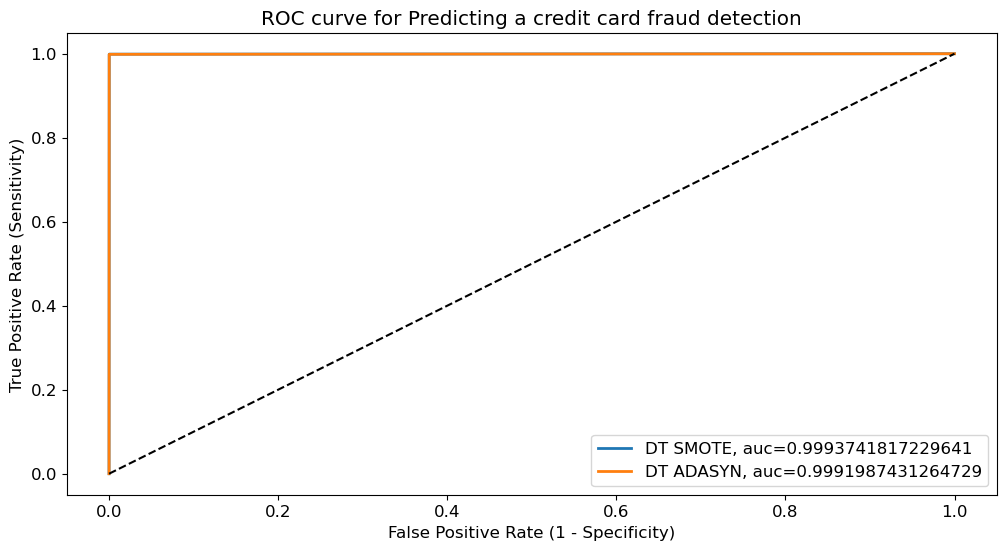

In [30]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT SMOTE', dt,X_train_smote,y_train_smote,X_test,y_test))
DTmodels.append(('DT ADASYN', dt,X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

Model Name : RF SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99991
Train AUC : 1.00000
Test AUC : 0.99947
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 0.99895
Train F1 : 1.00000
Test F1 : 0.99947
Confusion Matrix : 
 [[30150     0]
 [    3  2847]]


Model Name : RF ADASYN
Train Accuracy :1.00000
Test Accuracy :0.99985
Train AUC : 1.00000
Test AUC : 0.99912
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 0.99825
Train F1 : 1.00000
Test F1 : 0.99912
Confusion Matrix : 
 [[30150     0]
 [    5  2845]]




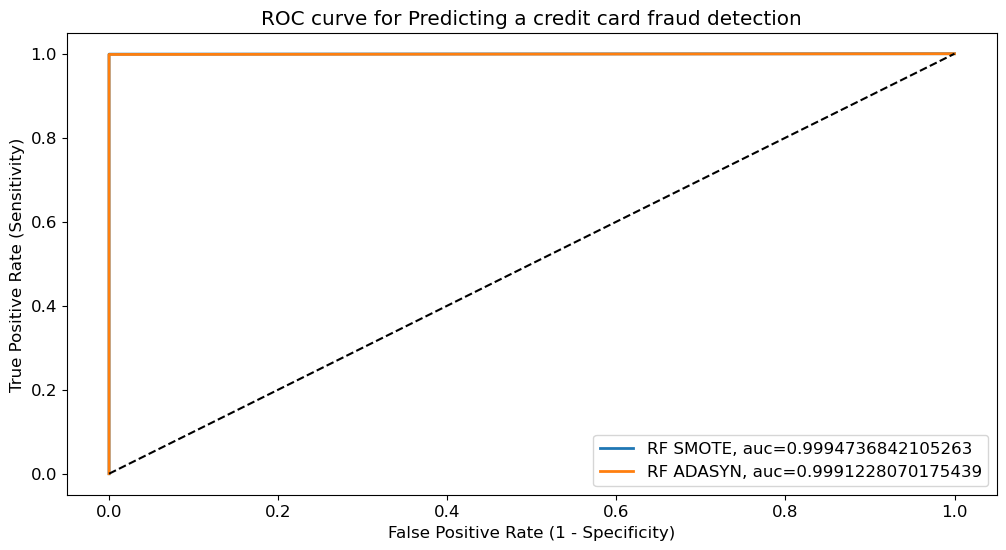

In [31]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

Model Name : NB SMOTE
Train Accuracy :0.88833
Test Accuracy :0.82291
Train AUC : 0.88833
Test AUC : 0.88863
Train Precision : 0.83627
Test Precision : 0.32413
Train Recall : 0.96575
Test Recall : 0.96807
Train F1 : 0.89636
Test F1 : 0.48565
Confusion Matrix : 
 [[24397  5753]
 [   91  2759]]


Model Name : NB ADASYN
Train Accuracy :0.92243
Test Accuracy :0.92533
Train AUC : 0.92247
Test AUC : 0.90147
Train Precision : 0.93164
Test Precision : 0.54207
Train Recall : 0.91250
Test Recall : 0.87263
Train F1 : 0.92197
Test F1 : 0.66873
Confusion Matrix : 
 [[28049  2101]
 [  363  2487]]




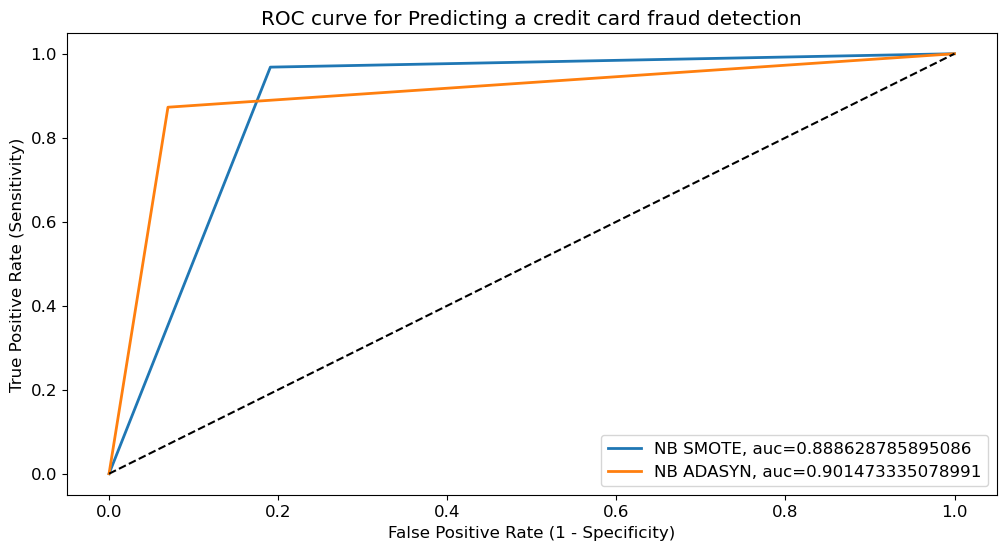

In [32]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))
NBmodels.append(('NB ADASYN', GaussianNB(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

In [33]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test
4,RF SMOTE,0.999909,0.999474,1.000000,0.998947,0.999473
5,RF ADASYN,0.999848,0.999123,1.000000,0.998246,0.999122
2,DT SMOTE,0.999727,0.999374,0.997897,0.998947,0.998422
3,DT ADASYN,0.999697,0.999199,0.997896,0.998596,0.998246
1,LR ADASYN,0.941152,0.945237,0.600710,0.950175,0.736070
0,LR SMOTE,0.935424,0.942420,0.576473,0.950877,0.717786
7,NB ADASYN,0.925333,0.901473,0.542066,0.872632,0.668728
6,NB SMOTE,0.822909,0.888629,0.324131,0.968070,0.485654


### RF SMOTE

In [34]:
# SMOTE Sampling with Random forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
random_forest.fit(X_train_smote, y_train_smote)

y_pred_smote = random_forest.predict(X_test)

In [35]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.99991
AUC : 0.99947
Precision : 1.00000
Recall : 0.99895
F1 : 0.99947


AUC -  0.9994736842105263 



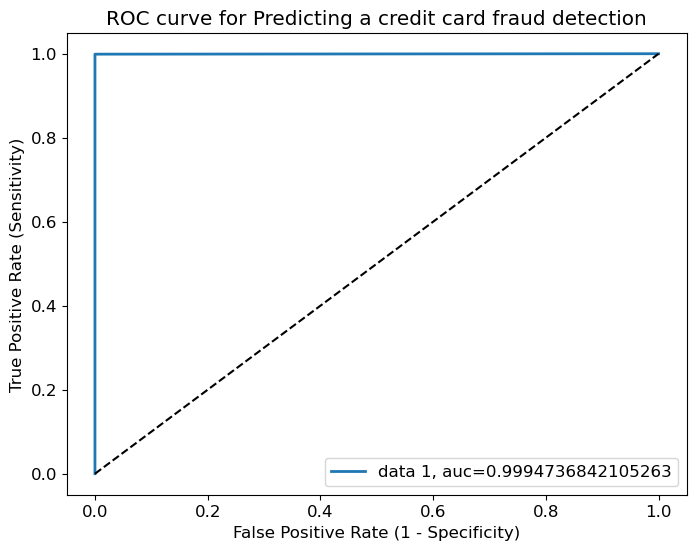

In [36]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.999


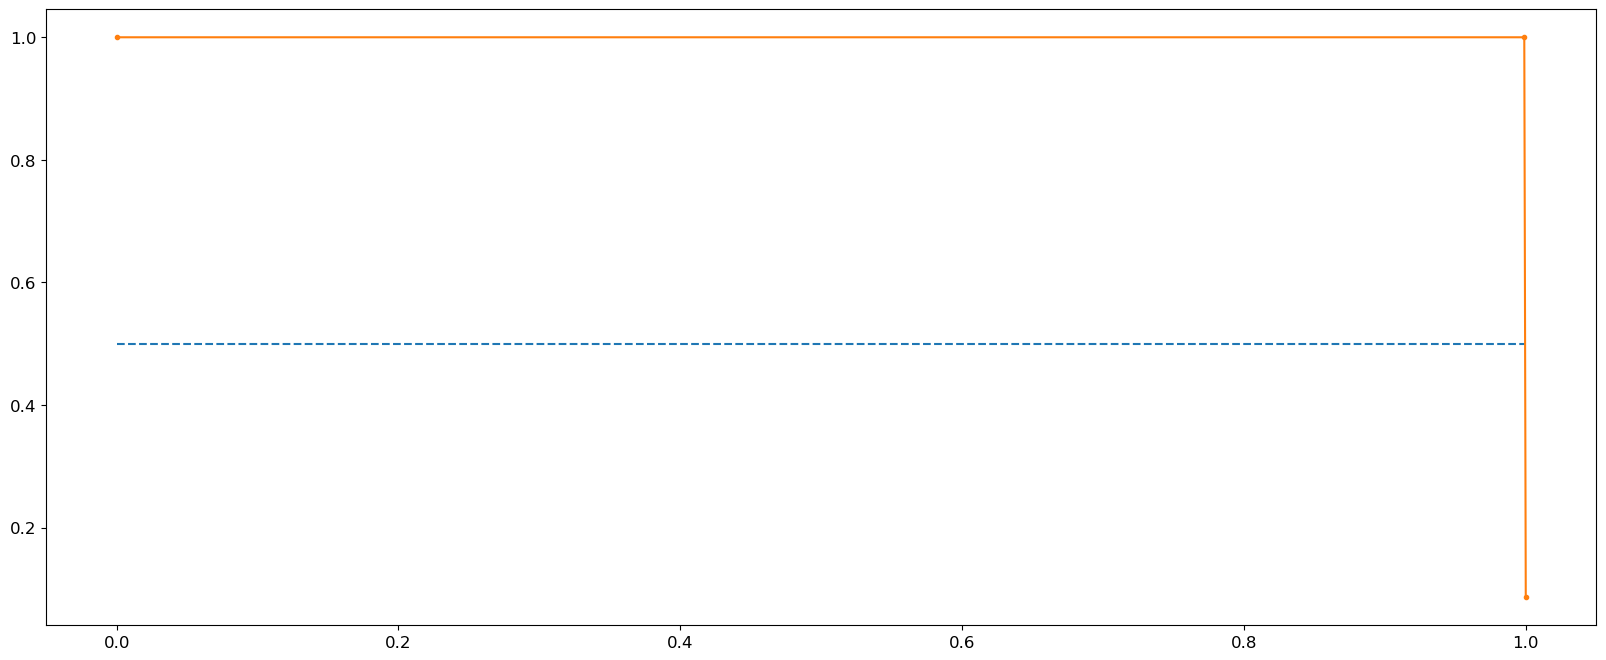

In [37]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

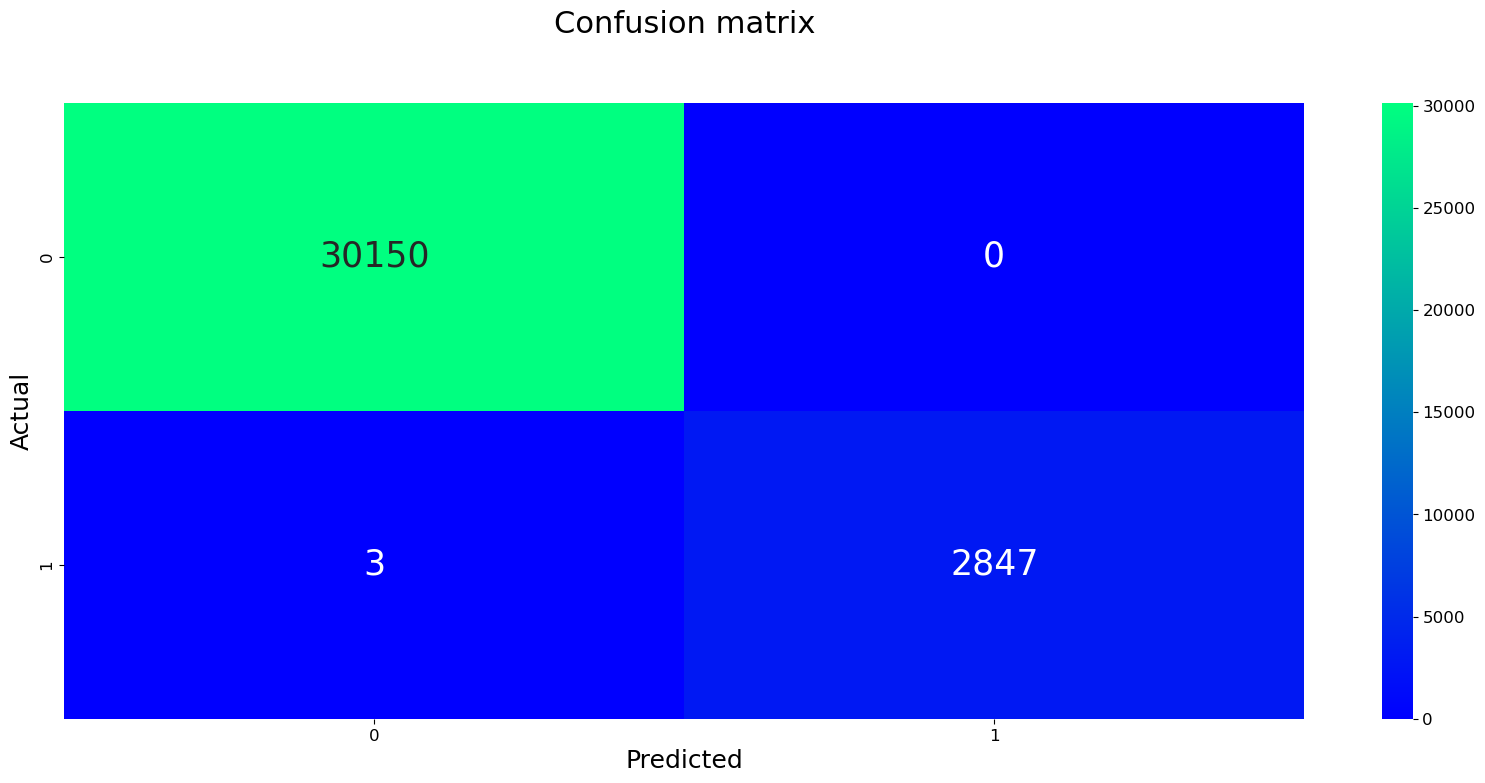

In [38]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

In [39]:
# Print details of the fraud transactions detected by the model
fraud_indices = (y_test == 1) & (y_pred_smote == 1)
fraudulent_transactions = X_test[fraud_indices]

print("Details of Fraudulent Transactions Detected by the Model:")
print(fraudulent_transactions)

Details of Fraudulent Transactions Detected by the Model:
       distance_from_home  distance_from_last_transaction  \
80917          162.022391                       20.773267   
84936            4.341059                        0.630449   
51685           13.803715                        0.191291   
12256          132.033509                       33.306821   
84610            1.952269                        0.253589   
...                   ...                             ...   
30122          154.239362                        0.208479   
11428          104.255006                        1.525709   
47935          151.668968                        0.084568   
25210            0.525598                      137.808818   
93361           21.659545                        1.068968   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
80917                        0.835173              1.0        0.0   
84936                        4.600339              1.0        0.0   
51